# Python Libraries 1

_Aug 5, 2020_ 

Agenda today:
- Introduction to Numpy: array math
- Introduction to Pandas: importing, indexing, and math

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Part I. Numpy
The basic data structure that exist in numpy is called numpy arrays. NP arrays are very similar to python lists. The __difference__ between a python list and a Numpy array is that list can only a mix of data types but array can only contain the same data type.

But what is the benefits of using NumPy array instead of the base python lists?
- Speed 
- Broadcasting Property

In [2]:
names_list=['Bob','John','Sally']
names_array=np.char.array(['Bob','John','Sally']) #use numpy.array for numbers and numpy.char.array for strings
print(names_list)
print(names_array)

['Bob', 'John', 'Sally']
['Bob' 'John' 'Sally']


In [3]:
import time

size_of_seq = 100000

def pure_python_version():
    tic = time.time()
    X = range(size_of_seq)
    Y = range(size_of_seq)
    Z = [X[i] + Y[i] for i in range(len(X)) ]
    toc = time.time()
    return toc - tic

def numpy_version():
    tic = time.time()
    X = np.arange(size_of_seq)
    Y = np.arange(size_of_seq)
    Z = X + Y 
    toc = time.time()
    return toc - tic


t1 = pure_python_version()
t2 = numpy_version()
print("python: " + str(t1), "numpy: "+ str(t2))
print("Numpy is in this example " + str(t1/t2) + " times faster!")

python: 0.0650167465209961 numpy: 0.0013849735260009766
Numpy is in this example 46.944396625925286 times faster!


In [4]:
## broadcasting and array math

np.array([2,3,4,6]) * 5

array([10, 15, 20, 30])

In [5]:
li = [2,3,4,6]
li * 5

[2, 3, 4, 6, 2, 3, 4, 6, 2, 3, 4, 6, 2, 3, 4, 6, 2, 3, 4, 6]

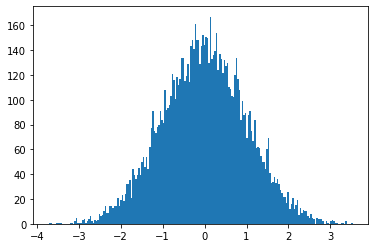

In [8]:
## simulation with numpy - in normal distribution

rand = np.random.randn(10000);
plt.hist(rand, bins = 200);

There are many other wonderous things numpy can do, you will encounter them later in the course of the program. 

## Part II. Pandas
Pandas stand for paneled data, and it is the most popular library for data scientists to manipulate, clean, and organize dataset in Python. The most fundamental data structure that exists in Pandas is called **DataFrames**. 

In [7]:
## importing data and look at optional parameters
df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
# examine and read the data

In [9]:
# examine the information in this dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [10]:
# examine the datatypes of the dataframe
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [11]:
# talk about series and dataframe
type(df)

pandas.core.frame.DataFrame

In [12]:
# indexing and subsetting 
type(df.mpg)

pandas.core.series.Series

In [13]:
# examine whether we have missing value - it could really affect the data!
df.mpg

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [14]:
df['weight'][3]

3433

In [16]:
df.iloc[3,4] #[row, column]

3433

In [17]:
#df.loc[] can index by name
df.loc[3,'weight']

3433

In [18]:
df.index

RangeIndex(start=0, stop=398, step=1)

In [26]:
# can subset by logic
# want weight great than 3000
# can not have the comparitors within the parameters
# : specifies all of them
df[(df['weight'] > 3000) & (df['acceleration'] > 10)] #logical conditional to create a subset a df #3000 is a series composed of booleans

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
364,26.6,8,350.0,105,3725,19.0,81,1,oldsmobile cutlass ls
365,20.2,6,200.0,88,3060,17.1,81,1,ford granada gl
366,17.6,6,225.0,85,3465,16.6,81,1,chrysler lebaron salon
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [27]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [30]:
# exercise - get the cars that are heavier than 3000 but has a horsepower less than 150 

# should be 150 cars that satisfy the criteria

df.loc[(df['weight'] > 3000) & (df['horsepower'] < 150)]

df = pd.DataFrame(data=d, dtype=np.int8)#<----- this is correct - df is composed incorrectly as a number

TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
# why do we seem to have anomaly in our data?


In [ ]:
# get rid of anomaly


In [ ]:
# exercise - get a list of car name where the mpg is less than 18 and weight is greater than 3500

# there should be 91 cars

In [31]:
#look at the descriptive stats 
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [32]:
df.sort_values(by = ['horsepower']) #then remove it

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
133,16.0,6,250.0,100,3781,17.0,74,1,chevrolet chevelle malibu classic
98,16.0,6,250.0,100,3278,18.0,73,1,chevrolet nova custom
256,20.5,6,225.0,100,3430,17.2,78,1,plymouth volare
107,18.0,6,232.0,100,2789,15.0,73,1,amc gremlin
334,23.7,3,70.0,100,2420,12.5,80,3,mazda rx-7 gs
...,...,...,...,...,...,...,...,...,...
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto


In [36]:
df['horsepower'] = df.horsepower.apply(lambda x: 0 if x =='?' else int(x))

#.apply(enter_function)
#!='int'